In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA Available: True
GPU Name: Tesla T4


TASK 1:

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Epoch 1/15, Loss: 1.2482
Epoch 2/15, Loss: 0.8844
Epoch 3/15, Loss: 0.7325
Epoch 4/15, Loss: 0.6133
Epoch 5/15, Loss: 0.5130
Epoch 6/15, Loss: 0.4196
Epoch 7/15, Loss: 0.3415
Epoch 8/15, Loss: 0.2754
Epoch 9/15, Loss: 0.2256
Epoch 10/15, Loss: 0.1807
Epoch 11/15, Loss: 0.1579
Epoch 12/15, Loss: 0.1359
Epoch 13/15, Loss: 0.1220
Epoch 14/15, Loss: 0.1114
Epoch 15/15, Loss: 0.1076


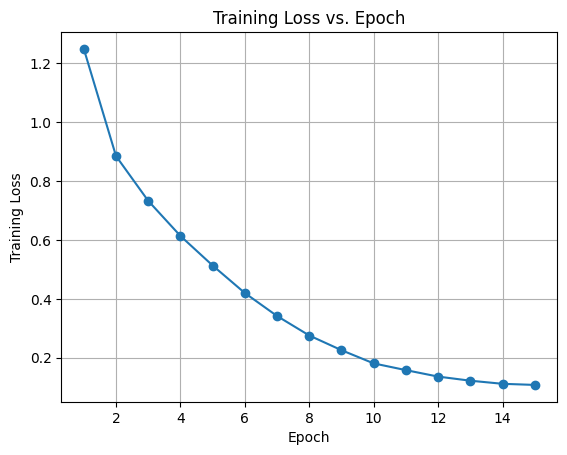

Confusion Matrix:
[[787  19  54   9  16  14  14  16  33  38]
 [ 27 816  12  12   2  10  10   5  21  85]
 [ 55   5 585  77  93  78  53  42   6   6]
 [ 25  11  57 513  70 183  73  47   6  15]
 [ 25   3  86  62 637  59  52  69   4   3]
 [ 22   4  59 166  42 621  22  54   3   7]
 [  8   3  58  67  50  34 755  13   4   8]
 [ 14   3  35  38  51  69  13 762   2  13]
 [ 95  34  21  21  10  17  12   7 747  36]
 [ 35  74  14  10   5  19   8  23  17 795]]

Performance Metrics Table:
Metric      Value     
Accuracy    0.7018    
Precision   0.7054    
Recall      0.7018    
F1-Score    0.7026    


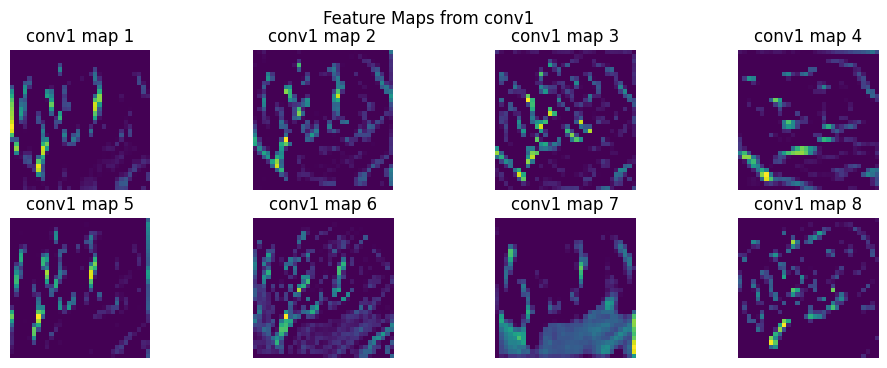

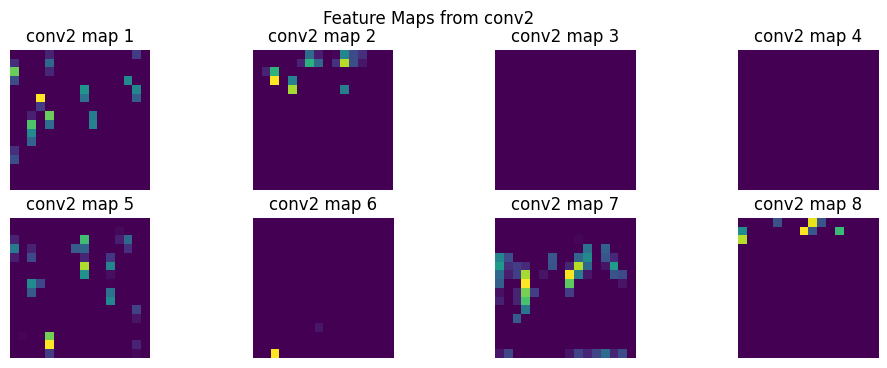

Running: LR=0.001, Batch=32, Filters=16, Layers=3
Result: Acc=0.5903, Prec=0.6039, Rec=0.5903, F1=0.5788
Running: LR=0.001, Batch=32, Filters=16, Layers=5
Result: Acc=0.5311, Prec=0.5476, Rec=0.5311, F1=0.5248
Running: LR=0.001, Batch=32, Filters=32, Layers=3
Result: Acc=0.6687, Prec=0.6703, Rec=0.6687, F1=0.6652
Running: LR=0.001, Batch=32, Filters=32, Layers=5
Result: Acc=0.6113, Prec=0.6245, Rec=0.6113, F1=0.6007
Running: LR=0.01, Batch=32, Filters=16, Layers=3
Result: Acc=0.4208, Prec=0.4316, Rec=0.4208, F1=0.4144
Running: LR=0.01, Batch=32, Filters=16, Layers=5
Result: Acc=0.3685, Prec=0.3553, Rec=0.3685, F1=0.3514
Running: LR=0.01, Batch=32, Filters=32, Layers=3
Result: Acc=0.3685, Prec=0.4155, Rec=0.3685, F1=0.3663
Running: LR=0.01, Batch=32, Filters=32, Layers=5
Result: Acc=0.3127, Prec=0.3596, Rec=0.3127, F1=0.2812

Table 1: Performance Metrics Comparison of CNN Models
LR    Batch   Filters Layers  Accuracy  Precision Recall    F1-Score  
0.001 32      16      3       0.5903  

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

import torch.nn as nn
import torch.optim as optim
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load CIFAR-10 from Hugging Face
dataset = load_dataset('cifar10')

# Define transforms: convert to tensor and normalize
transform = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Custom Dataset wrapper to apply transforms
class CIFAR10TorchDataset(torch.utils.data.Dataset):
	def __init__(self, hf_dataset, transform=None):
		self.dataset = hf_dataset
		self.transform = transform
	def __len__(self):
		return len(self.dataset)
	def __getitem__(self, idx):
		img = self.dataset[idx]['img']
		label = self.dataset[idx]['label']
		if self.transform:
			img = self.transform(img)
		return img, label

# Prepare train and test datasets
train_dataset = CIFAR10TorchDataset(dataset['train'], transform=transform)
test_dataset = CIFAR10TorchDataset(dataset['test'], transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




# Define a simple CNN architecture
class SimpleCNN(nn.Module):
	def __init__(self):
		super(SimpleCNN, self).__init__()
		self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
		self.relu1 = nn.ReLU()
		self.pool1 = nn.MaxPool2d(2, 2)
		self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
		self.relu2 = nn.ReLU()
		self.pool2 = nn.MaxPool2d(2, 2)
		self.fc1 = nn.Linear(64 * 8 * 8, 128)
		self.relu3 = nn.ReLU()
		self.fc2 = nn.Linear(128, 10)
	def forward(self, x):
		x = self.pool1(self.relu1(self.conv1(x)))
		x = self.pool2(self.relu2(self.conv2(x)))
		x = x.view(x.size(0), -1)
		x = self.relu3(self.fc1(x))
		x = self.fc2(x)
		return x

# Instantiate model, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 15
train_losses = []
for epoch in range(num_epochs):
	model.train()
	running_loss = 0.0
	for images, labels in train_loader:
		images, labels = images.to(device), labels.to(device)
		optimizer.zero_grad()
		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		running_loss += loss.item() * images.size(0)
	epoch_loss = running_loss / len(train_loader.dataset)
	train_losses.append(epoch_loss)
	print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot training loss vs. epoch
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.grid(True)
plt.show()

# Model Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
	for images, labels in test_loader:
		images, labels = images.to(device), labels.to(device)
		outputs = model(images)
		_, predicted = torch.max(outputs, 1)
		y_true.extend(labels.cpu().numpy())
		y_pred.extend(predicted.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\nPerformance Metrics Table:")
print(f"{'Metric':<12}{'Value':<10}")
print(f"{'Accuracy':<12}{accuracy:<10.4f}")
print(f"{'Precision':<12}{precision:<10.4f}")
print(f"{'Recall':<12}{recall:<10.4f}")
print(f"{'F1-Score':<12}{f1:<10.4f}")

#  Feature Map Extraction and Visualization
def visualize_feature_maps(model, image, device):
	model.eval()
	image = image.unsqueeze(0).to(device)
	with torch.no_grad():
		# Extract feature maps from conv1 and conv2
		x1 = model.relu1(model.conv1(image))
		x2 = model.relu2(model.conv2(model.pool1(x1)))
	# Plot feature maps for conv1
	plt.figure(figsize=(12, 4))
	for i in range(8):  # Show first 8 feature maps
		plt.subplot(2, 4, i+1)
		plt.imshow(x1[0, i].cpu().numpy(), cmap='viridis')
		plt.title(f'conv1 map {i+1}')
		plt.axis('off')
	plt.suptitle('Feature Maps from conv1')
	plt.show()
	# Plot feature maps for conv2
	plt.figure(figsize=(12, 4))
	for i in range(8):
		plt.subplot(2, 4, i+1)
		plt.imshow(x2[0, i].cpu().numpy(), cmap='viridis')
		plt.title(f'conv2 map {i+1}')
		plt.axis('off')
	plt.suptitle('Feature Maps from conv2')
	plt.show()

# Get a sample image from test set
sample_img, _ = test_dataset[0]
visualize_feature_maps(model, sample_img, device)

#  Hyperparameter Ablation Study
def run_experiment(lr, batch_size, num_filters, num_layers):
	# Dynamically build CNN with variable filters/layers
	class AblationCNN(nn.Module):
		def __init__(self):
			super(AblationCNN, self).__init__()
			layers = []
			in_channels = 3
			for i in range(num_layers):
				out_channels = num_filters
				layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
				layers.append(nn.ReLU())
				layers.append(nn.MaxPool2d(2, 2))
				in_channels = out_channels
			self.conv = nn.Sequential(*layers)
			self.fc1 = nn.Linear(num_filters * (32 // (2 ** num_layers)) * (32 // (2 ** num_layers)), 128)
			self.relu = nn.ReLU()
			self.fc2 = nn.Linear(128, 10)
		def forward(self, x):
			x = self.conv(x)
			x = x.view(x.size(0), -1)
			x = self.relu(self.fc1(x))
			x = self.fc2(x)
			return x
	# DataLoader with batch size
	train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
	test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
	model = AblationCNN().to(device)
	criterion = nn.CrossEntropyLoss()
	optimizer = optim.Adam(model.parameters(), lr=lr)
	# Train for fewer epochs for speed
	for epoch in range(2):
		model.train()
		for images, labels in train_loader:
			images, labels = images.to(device), labels.to(device)
			optimizer.zero_grad()
			outputs = model(images)
			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()
	# Evaluate
	model.eval()
	y_true, y_pred = [], []
	with torch.no_grad():
		for images, labels in test_loader:
			images, labels = images.to(device), labels.to(device)
			outputs = model(images)
			_, predicted = torch.max(outputs, 1)
			y_true.extend(labels.cpu().numpy())
			y_pred.extend(predicted.cpu().numpy())
	accuracy = accuracy_score(y_true, y_pred)
	precision = precision_score(y_true, y_pred, average='macro')
	recall = recall_score(y_true, y_pred, average='macro')
	f1 = f1_score(y_true, y_pred, average='macro')
	return accuracy, precision, recall, f1

# Hyperparameter values
learning_rates = [0.001, 0.01]
batch_sizes = [32]
num_filters_list = [16, 32]
num_layers_list = [3, 5]

results = []
for lr in learning_rates:
	for batch_size in batch_sizes:
		for num_filters in num_filters_list:
			for num_layers in num_layers_list:
				out_size = 32 // (2 ** num_layers)
				if out_size < 1:
					print(f"Skipping: LR={lr}, Batch={batch_size}, Filters={num_filters}, Layers={num_layers} (output size < 1)")
					continue
				print(f"Running: LR={lr}, Batch={batch_size}, Filters={num_filters}, Layers={num_layers}")
				acc, prec, rec, f1 = run_experiment(lr, batch_size, num_filters, num_layers)
				results.append({
					'LR': lr,
					'Batch': batch_size,
					'Filters': num_filters,
					'Layers': num_layers,
					'Accuracy': acc,
					'Precision': prec,
					'Recall': rec,
					'F1-Score': f1
				})
				print(f"Result: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

# Print summary table
print("\nTable 1: Performance Metrics Comparison of CNN Models")
print(f"{'LR':<6}{'Batch':<8}{'Filters':<8}{'Layers':<8}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}")
for r in results:
	print(f"{r['LR']:<6}{r['Batch']:<8}{r['Filters']:<8}{r['Layers']:<8}{r['Accuracy']:<10.4f}{r['Precision']:<10.4f}{r['Recall']:<10.4f}{r['F1-Score']:<10.4f}")

TASK 2:

Epoch 1/10, Loss: 6.6552
Epoch 2/10, Loss: 6.0617
Epoch 3/10, Loss: 5.7527
Epoch 4/10, Loss: 5.4805
Epoch 5/10, Loss: 5.2160
Epoch 6/10, Loss: 4.9601
Epoch 7/10, Loss: 4.7145
Epoch 8/10, Loss: 4.4849
Epoch 9/10, Loss: 4.2680
Epoch 10/10, Loss: 4.0655


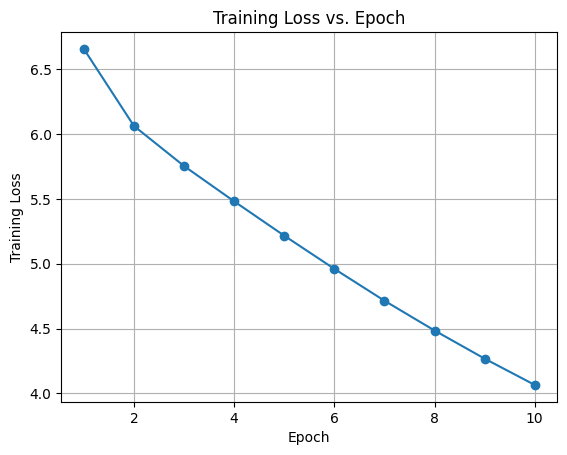


Generated text:
to be or not to be revenged in their dumbness and as i have not

Evaluation: Loss=3.6636, Perplexity=39.0007, Accuracy=0.2759

Ablation Study: Hidden Size Comparison
HiddenSize  Loss      Perplexity  Accuracy  
64          5.7582    316.7849    0.0972    
128         5.4437    231.3038    0.1121    
256         4.9724    144.3718    0.1327    


In [3]:
# Load and preprocess Shakespeare dataset

import torch
import matplotlib.pyplot as plt
import re
import requests

# Load Tiny Shakespeare dataset from raw URL
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
response = requests.get(url)
text = response.text

# Basic preprocessing: lowercase, remove non-alphabetic chars, tokenize
def preprocess(text):
	text = text.lower()
	text = re.sub(r'[^a-z\s]', '', text)
	tokens = text.split()
	return tokens

tokens = preprocess(text)

# Build vocabulary
vocab = sorted(set(tokens))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

# Convert tokens to indices
data_indices = [word2idx[w] for w in tokens]

# Prepare sequences for next-word prediction
seq_length = 5
inputs = []
targets = []
for i in range(len(data_indices) - seq_length):
	inputs.append(data_indices[i:i+seq_length])
	targets.append(data_indices[i+seq_length])

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

#  Define RNN Model (LSTM)
import torch.nn as nn

class ShakespeareRNN(nn.Module):
	def __init__(self, vocab_size, embed_size=64, hidden_size=128, num_layers=2):
		super(ShakespeareRNN, self).__init__()
		self.embedding = nn.Embedding(vocab_size, embed_size)
		self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
		self.fc = nn.Linear(hidden_size, vocab_size)
	def forward(self, x, hidden=None):
		x = self.embedding(x)
		out, hidden = self.lstm(x, hidden)
		out = self.fc(out[:, -1, :])  # Use last output for prediction
		return out, hidden

# Dataset and DataLoader
from torch.utils.data import TensorDataset, DataLoader
batch_size = 64
dataset = TensorDataset(inputs, targets)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ShakespeareRNN(vocab_size=len(vocab)).to(device)

#  Train the model and plot training curve
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
	model.train()
	running_loss = 0.0
	for batch_inputs, batch_targets in train_loader:
		batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
		optimizer.zero_grad()
		outputs, _ = model(batch_inputs)
		loss = criterion(outputs, batch_targets)
		loss.backward()
		optimizer.step()
		running_loss += loss.item() * batch_inputs.size(0)
	epoch_loss = running_loss / len(train_loader.dataset)
	train_losses.append(epoch_loss)
	print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot training loss curve
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.grid(True)
plt.show()

#  Generate text predictions from seed phrase
def generate_text(model, seed_phrase, num_words=10):
	model.eval()
	words = seed_phrase.lower().split()
	state = None
	for _ in range(num_words):
		# Prepare input
		input_seq = [word2idx.get(w, 0) for w in words[-seq_length:]]
		input_tensor = torch.tensor(input_seq).unsqueeze(0).to(device)
		with torch.no_grad():
			output, state = model(input_tensor, state)
			next_word_idx = output.argmax(dim=1).item()
		next_word = idx2word[next_word_idx]
		words.append(next_word)
	return ' '.join(words)

seed = "to be or not to"
generated = generate_text(model, seed, num_words=10)
print("\nGenerated text:")
print(generated)

# Evaluate model performance (perplexity, accuracy)
def evaluate_model(model, data_loader):
	model.eval()
	total_loss = 0.0
	correct = 0
	total = 0
	with torch.no_grad():
		for batch_inputs, batch_targets in data_loader:
			batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
			outputs, _ = model(batch_inputs)
			loss = criterion(outputs, batch_targets)
			total_loss += loss.item() * batch_inputs.size(0)
			preds = outputs.argmax(dim=1)
			correct += (preds == batch_targets).sum().item()
			total += batch_targets.size(0)
	avg_loss = total_loss / total
	perplexity = torch.exp(torch.tensor(avg_loss)).item()
	accuracy = correct / total
	return avg_loss, perplexity, accuracy

avg_loss, perplexity, accuracy = evaluate_model(model, train_loader)
print(f"\nEvaluation: Loss={avg_loss:.4f}, Perplexity={perplexity:.4f}, Accuracy={accuracy:.4f}")

# Ablation study (vary hidden size)
hidden_sizes = [64, 128, 256]
ablation_results = []
for hs in hidden_sizes:
	ablation_model = ShakespeareRNN(vocab_size=len(vocab), hidden_size=hs).to(device)
	ablation_optimizer = torch.optim.Adam(ablation_model.parameters(), lr=0.001)
	# Train for fewer epochs for speed
	for epoch in range(3):
		ablation_model.train()
		for batch_inputs, batch_targets in train_loader:
			batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
			ablation_optimizer.zero_grad()
			outputs, _ = ablation_model(batch_inputs)
			loss = criterion(outputs, batch_targets)
			loss.backward()
			ablation_optimizer.step()
	avg_loss, perplexity, accuracy = evaluate_model(ablation_model, train_loader)
	ablation_results.append((hs, avg_loss, perplexity, accuracy))

print("\nAblation Study: Hidden Size Comparison")
print(f"{'HiddenSize':<12}{'Loss':<10}{'Perplexity':<12}{'Accuracy':<10}")
for hs, loss, perp, acc in ablation_results:
	print(f"{hs:<12}{loss:<10.4f}{perp:<12.4f}{acc:<10.4f}")


TASK 3:


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]


Training PixelCNN...
Epoch 1, Train Loss: 4.7110
Epoch 1, Val Loss: 4.4528
Epoch 2, Train Loss: 4.2321
Epoch 2, Val Loss: 4.1204


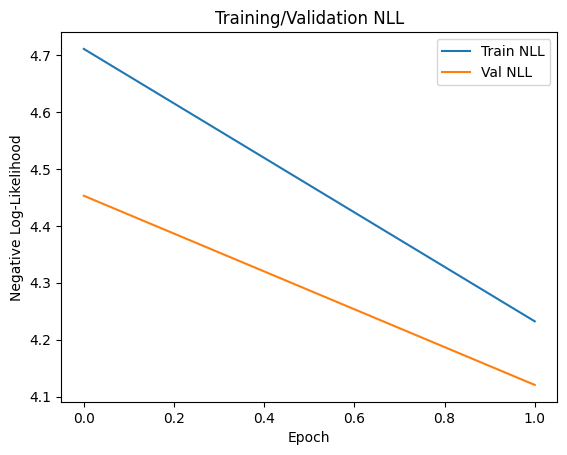


Training Row LSTM...


ValueError: input must have the type torch.float32, got type torch.int64

In [4]:
# Task 3: PixelRNN Models for CIFAR-10
# pip install torch torchvision datasets matplotlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 from Hugging Face
dataset = load_dataset('cifar10')

# Preprocess: convert to tensor, normalize to [0, 1], and quantize to 256 levels
transform = transforms.Compose([
	transforms.ToTensor(),
])

class CIFAR10GenDataset(torch.utils.data.Dataset):
	def __init__(self, hf_dataset, transform=None):
		self.dataset = hf_dataset
		self.transform = transform
	def __len__(self):
		return len(self.dataset)
	def __getitem__(self, idx):
		img = self.dataset[idx]['img']
		if self.transform:
			img = self.transform(img)
		# Quantize pixel values to 0-255 (for discrete softmax)
		img = (img * 255).long()
		return img

train_dataset = CIFAR10GenDataset(dataset['train'], transform=transform)
test_dataset = CIFAR10GenDataset(dataset['test'], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ------------------ PixelCNN ------------------
class MaskedConv2d(nn.Conv2d):
	def __init__(self, mask_type, *args, **kwargs):
		super().__init__(*args, **kwargs)
		assert mask_type in ['A', 'B']
		self.register_buffer('mask', self.weight.data.clone())
		_, _, kH, kW = self.weight.size()
		self.mask.fill_(1)
		yc, xc = kH // 2, kW // 2
		self.mask[:, :, yc+1:, :] = 0
		self.mask[:, :, yc, xc+1:] = 0
		if mask_type == 'A':
			self.mask[:, :, yc, xc] = 0
	def forward(self, x):
		self.weight.data *= self.mask
		return super().forward(x)

class PixelCNN(nn.Module):
	def __init__(self, in_channels=3, n_filters=64, n_layers=7):
		super().__init__()
		layers = [MaskedConv2d('A', in_channels, n_filters, 7, padding=3)]
		for _ in range(n_layers-1):
			layers.append(nn.ReLU())
			layers.append(MaskedConv2d('B', n_filters, n_filters, 7, padding=3))
		layers.append(nn.ReLU())
		layers.append(nn.Conv2d(n_filters, 256*in_channels, 1))
		self.net = nn.Sequential(*layers)
		self.in_channels = in_channels
	def forward(self, x):
		out = self.net(x.float())
		# Reshape for softmax over 256 values per channel
		B, _, H, W = out.shape
		out = out.view(B, self.in_channels, 256, H, W)
		return out

# ------------------ Row LSTM ------------------
class RowLSTM(nn.Module):
	def __init__(self, in_channels=3, hidden_size=64, n_layers=2):
		super().__init__()
		self.lstm = nn.LSTM(input_size=in_channels, hidden_size=hidden_size, num_layers=n_layers, batch_first=True)
		self.fc = nn.Linear(hidden_size, 256*in_channels)
		self.in_channels = in_channels
	def forward(self, x):
		# x: (B, C, H, W) -> (B*H, W, C)
		B, C, H, W = x.shape
		x = x.permute(0,2,3,1).contiguous().view(B*H, W, C)
		out, _ = self.lstm(x)
		out = self.fc(out)
		out = out.view(B, H, W, self.in_channels, 256).permute(0,3,4,1,2)
		return out

# ------------------ Diagonal BiLSTM ------------------
class DiagonalBiLSTM(nn.Module):
	def __init__(self, in_channels=3, hidden_size=64, n_layers=2):
		super().__init__()
		self.lstm_fwd = nn.LSTM(input_size=in_channels, hidden_size=hidden_size, num_layers=n_layers, batch_first=True, bidirectional=False)
		self.lstm_bwd = nn.LSTM(input_size=in_channels, hidden_size=hidden_size, num_layers=n_layers, batch_first=True, bidirectional=False)
		self.fc = nn.Linear(2*hidden_size, 256*in_channels)
		self.in_channels = in_channels
	def skew(self, x):
		# Skew input for diagonal processing
		B, C, H, W = x.shape
		skewed = torch.zeros(B, C, H+W-1, W, device=x.device)
		for i in range(H):
			skewed[:,:,i:i+W,i] = x[:,:,i,:]
		return skewed
	def unskew(self, x, H, W):
		# Unskew output
		B, C, _, _ = x.shape
		out = torch.zeros(B, C, H, W, device=x.device)
		for i in range(H):
			out[:,:,i,:] = x[:,:,i:i+W,i]
		return out
	def forward(self, x):
		B, C, H, W = x.shape
		x_skew = self.skew(x)
		# Forward LSTM
		fwd_out, _ = self.lstm_fwd(x_skew.permute(0,2,3,1).contiguous().view(B*(H+W-1), W, C))
		# Backward LSTM
		bwd_out, _ = self.lstm_bwd(torch.flip(x_skew, [2]).permute(0,2,3,1).contiguous().view(B*(H+W-1), W, C))
		# Combine
		out = torch.cat([fwd_out, bwd_out], dim=-1)
		out = self.fc(out)
		out = out.view(B, H+W-1, W, self.in_channels, 256)
		# Unskew
		out = out.permute(0,3,4,1,2)
		out = self.unskew(out, H, W)
		return out

# ------------------ Training & Evaluation ------------------
def train_model(model, train_loader, test_loader, epochs=2):
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
	model = model.to(device)
	optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
	train_losses, test_losses = [], []
	for epoch in range(epochs):
		model.train()
		running_loss = 0.0
		for images in train_loader:
			images = images.to(device)
			optimizer.zero_grad()
			outputs = model(images)
			# outputs: (B, C, 256, H, W), images: (B, C, H, W)
			logits = outputs.permute(0, 1, 3, 4, 2).reshape(-1, 256)  # [B*C*H*W, 256]
			targets = images.permute(0, 1, 2, 3).reshape(-1)          # [B*C*H*W]
			loss = F.cross_entropy(logits, targets, reduction='mean')
			loss.backward()
			optimizer.step()
			running_loss += loss.item() * images.size(0)
		epoch_loss = running_loss / len(train_loader.dataset)
		train_losses.append(epoch_loss)
		print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}")
		# Validation
		model.eval()
		val_loss = 0.0
		with torch.no_grad():
			for images in test_loader:
				images = images.to(device)
				outputs = model(images)
				logits = outputs.permute(0, 1, 3, 4, 2).reshape(-1, 256)
				targets = images.permute(0, 1, 2, 3).reshape(-1)
				loss = F.cross_entropy(logits, targets, reduction='mean')
				val_loss += loss.item() * images.size(0)
		val_loss /= len(test_loader.dataset)
		test_losses.append(val_loss)
		print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")
	# Plot
	plt.plot(train_losses, label='Train NLL')
	plt.plot(test_losses, label='Val NLL')
	plt.xlabel('Epoch')
	plt.ylabel('Negative Log-Likelihood')
	plt.title('Training/Validation NLL')
	plt.legend()
	plt.show()
	return train_losses, test_losses

# ------------------ Run All Models ------------------
print("\nTraining PixelCNN...")
pixelcnn = PixelCNN()
train_model(pixelcnn, train_loader, test_loader, epochs=2)

print("\nTraining Row LSTM...")
rowlstm = RowLSTM()
train_model(rowlstm, train_loader, test_loader, epochs=2)

print("\nTraining Diagonal BiLSTM...")
diagonal_bilstm = DiagonalBiLSTM()
train_model(diagonal_bilstm, train_loader, test_loader, epochs=2)

# ------------------ Model Comparison ------------------
print("Compare models using NLL curves above. For further metrics, see PixelRNN paper.")
# Task 3: PixelRNN Models for CIFAR-10
# pip install torch torchvision datasets matplotlib
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load CIFAR-10 from Hugging Face
dataset = load_dataset('cifar10')

# Preprocess: convert to tensor, normalize to [0, 1], and quantize to 256 levels
transform = transforms.Compose([
	transforms.ToTensor(),
])

class CIFAR10GenDataset(torch.utils.data.Dataset):
	def __init__(self, hf_dataset, transform=None):
		self.dataset = hf_dataset
		self.transform = transform
	def __len__(self):
		return len(self.dataset)
	def __getitem__(self, idx):
		img = self.dataset[idx]['img']
		if self.transform:
			img = self.transform(img)
		# Quantize pixel values to 0-255 (for discrete softmax)
		img = (img * 255).long()
		return img

train_dataset = CIFAR10GenDataset(dataset['train'], transform=transform)
test_dataset = CIFAR10GenDataset(dataset['test'], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
